<a href="https://colab.research.google.com/github/MEPritchard/EduPerformance/blob/main/eduperformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Data From Github orginally from Kaggle
https://www.kaggle.com/datasets/dillonmyrick/high-school-student-performance-and-demographics

In [434]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [435]:
url_math = "https://github.com/MEPritchard/EduPerformance/raw/main/student_math_clean.csv"
url_portugese = "https://github.com/MEPritchard/EduPerformance/raw/main/student_portuguese_clean.csv"

In [436]:
df1 = pd.read_csv(url_math)
df2 = pd.read_csv(url_portugese)

#Most of the data from url_portugese is repetative, save grades and absences. Manually drop all columns between 'student_id' and 'grade_1_x'.

In [437]:
df2 = df2.drop(df2.columns[1:30], axis = 1)

In [446]:
merged_df = pd.merge(df1, df2, on='student_id')
merged_df.describe()
#75 abscences_x with std of 8!

,student_id,age,class_failures,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences_x,grade_1_x,grade_2_x,final_grade_x,absences_y,grade_1_y,grade_2_y,final_grade_y
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,198.000000,16.696203,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,4.055696,12.005063,12.035443,12.460759
std,114.170924,1.276043,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,5.118587,2.420298,2.417945,2.604244
min,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,99.500000,16.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,0.000000,10.000000,10.000000,11.000000
50%,198.000000,17.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,2.000000,12.000000,12.000000,12.000000
75%,296.500000,18.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,6.000000,14.000000,13.000000,14.000000
max,395.000000,22.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,32.000000,18.000000,19.000000,19.000000


#A majority of the values in this are string object data types. The number of unique responses is low. Casting all objects to int type to catagorize.

In [439]:
def index_unique_responses(dataframe):
    """
    Iterate through each column in a DataFrame. If the data type of the column is object,
    it lists unique values and indexes each unique response from 1 to n.

    Returns:
    - DataFrame with unique responses indexed from 1 to n for object-type columns
    """
    def index_column(column):
        unique_values = column.unique()
        mapping = {value: index+1 for index, value in enumerate(unique_values)}
        return column.map(mapping)

    indexed_dataframe = dataframe.copy()
    for column in indexed_dataframe.columns:
        if indexed_dataframe[column].dtype == 'object':
            indexed_dataframe[column] = index_column(indexed_dataframe[column])
    return indexed_dataframe

In [440]:
#drop 'student_id' for scale.
int_df=index_unique_responses(data_df.drop(columns=['student_id']))
int_df.info()
#check all dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   school                 394 non-null    int64
 1   sex                    394 non-null    int64
 2   age                    394 non-null    int64
 3   address_type           394 non-null    int64
 4   family_size            394 non-null    int64
 5   parent_status          394 non-null    int64
 6   mother_education       394 non-null    int64
 7   father_education       394 non-null    int64
 8   mother_job             394 non-null    int64
 9   father_job             394 non-null    int64
 10  school_choice_reason   394 non-null    int64
 11  guardian               394 non-null    int64
 12  travel_time            394 non-null    int64
 13  study_time             394 non-null    int64
 14  class_failures         394 non-null    int64
 15  school_support         394 non-null    i

#By converting all values in the dataset to a correlated value allows a clustermap to depict and organize the largest contributor/detractors to grades.

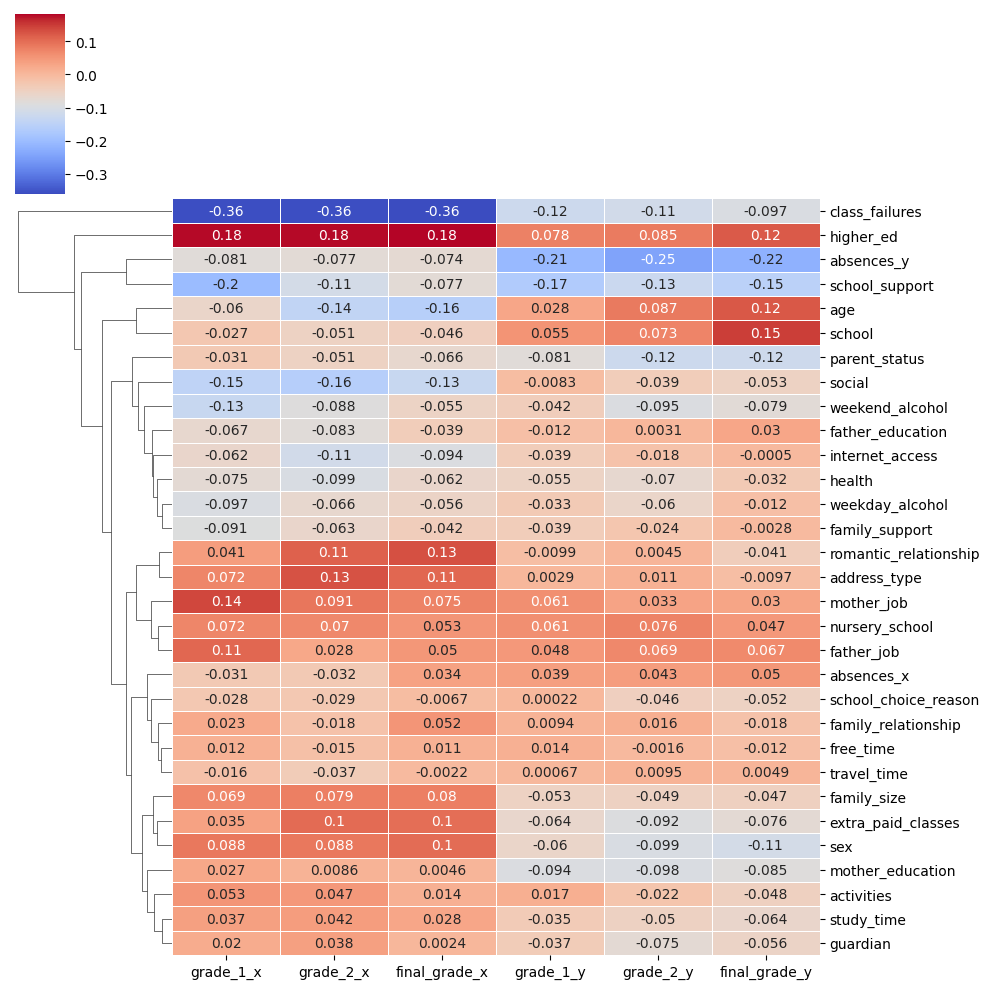

In [445]:
df = pd.DataFrame(int_df).corr()

# Select the last 6 columns for the y-axis and the first 28 columns for the x-axis
df_clustermap = df.iloc[:, :31]

# Create the clustermap
sns.clustermap(df_clustermap.T.iloc[::-1, -6:], row_cluster=True, col_cluster=False, cmap='coolwarm',linewidths=.5, annot=True)

plt.show()

Summary: The largest correlation found this this data set comparing all availibly metric to grades was a negative correlation between 'class_failures' and 'grade_x's. The largest postive correlation was found bewtwen the intent to 'higher ed'. Most correlations are negligible.

Up Next: Moving on I would like to meet with a team to discuss the absences in the school. It appears that 73 absences may be an outlier but several other students also increase the std deviation of this metric.